In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv("./datasets/weight-height.csv")

In [23]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [24]:
df.duplicated().sum()

0

In [25]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [26]:
df.shape

(10000, 3)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


# Distribution of the column

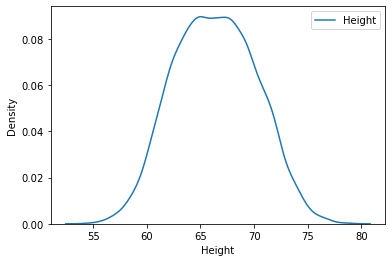

In [28]:
sns.kdeplot(df["Height"],label="Height")
plt.legend()
plt.show()

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


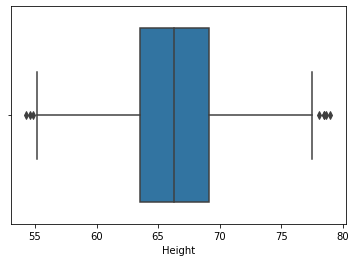

In [29]:
sns.boxplot(df["Height"])
plt.show()

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


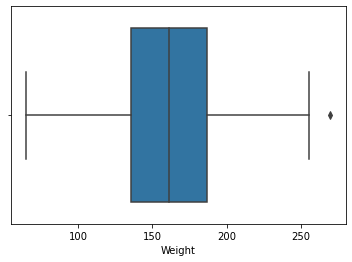

In [30]:
sns.boxplot(df["Weight"])
plt.show()

# Trimming
### We will be removing the outlier of "Height" column because, it has both side out lier

In [31]:
upper_limit=df["Height"].quantile(0.99)
lower_limit=df["Height"].quantile(0.01)

In [32]:
df=df[(df["Height"]<upper_limit) & (df["Height"]>lower_limit)]

In [33]:
df.shape

(9800, 3)

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


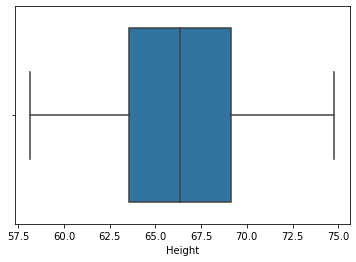

In [34]:
sns.boxplot(df["Height"])
plt.show()

# Capping

In [35]:
df=pd.read_csv("./datasets/weight-height.csv")

In [37]:
df["Height"]=np.where(
    df["Height"]>upper_limit,
    upper_limit,
    np.where(
        df["Height"]<lower_limit,
        lower_limit,
        df["Height"]
    )
)

In [38]:
df.shape

(10000, 3)

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


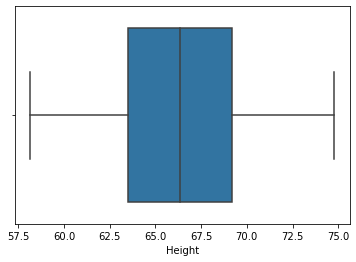

In [39]:
sns.boxplot(df["Height"])
plt.show()